In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
from numpy import array


In [2]:
names_babys = pd.read_csv('yob1880.txt', names=['nome', 'sexo','quantidade'])

In [3]:
names_babys


,nome,sexo,quantidade
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
names_babys.groupby('sexo').quantidade.sum()

sexo
F     90994
M    110490
Name: quantidade, dtype: int64

In [5]:
anos = range(1880,2011)

lista = []
colunas = ['nome','sexo','quantidade']

for ano in anos:
    pacote = 'C:/Users/guilh/Desktop/Projeto_Guilherme/Nomes/yob%d.txt' % ano
    frame = pd.read_csv(pacote, names=colunas)
    
    frame['ano']=ano
    lista.append(frame)
    
    nomes_babys = pd.concat(lista,ignore_index=True)

In [6]:
#lista

In [7]:
nomes_babys

,nome,sexo,quantidade,ano
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692391,Zymaire,M,5,2010
1692392,Zyonne,M,5,2010
1692393,Zyquarius,M,5,2010
1692394,Zyran,M,5,2010


In [8]:
total_anos = nomes_babys.pivot_table('quantidade',index='ano',columns='sexo',aggfunc=sum)

In [9]:
total_anos.tail()

sexo,F,M
ano,,
2006,1900375,2054352
2007,1921655,2074427
2008,1889800,2038995
2009,1835873,1982310
2010,1776223,1917416


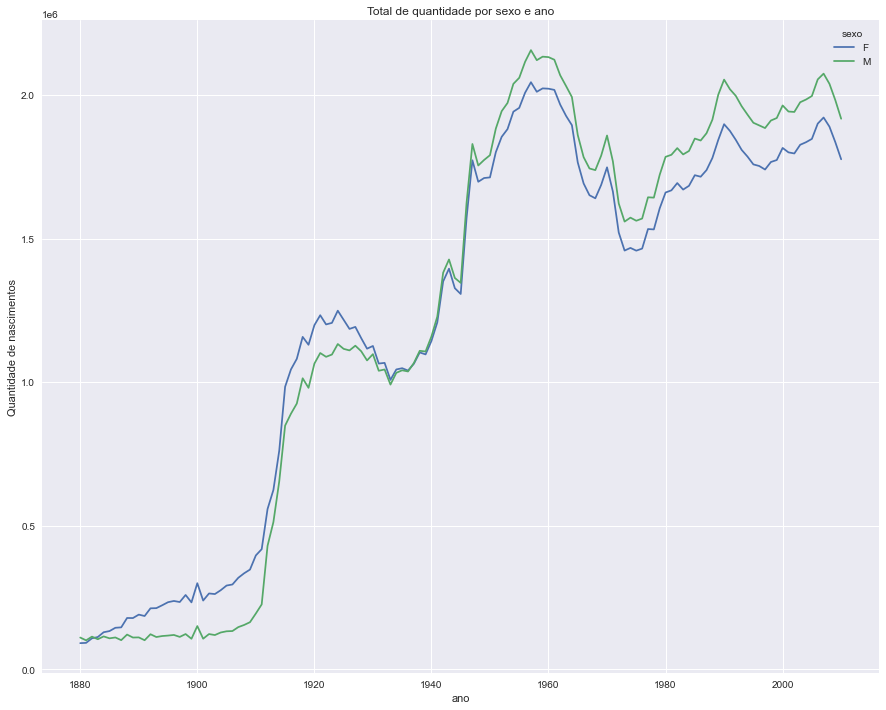

In [28]:
total_anos.plot(title='Total de quantidade por sexo e ano', figsize=(15,12))
plt.ylabel('Quantidade de nascimentos')
plt.show()


In [29]:
def nome_que_procuro (seu_nome):
    nome_lista = nomes_babys.loc[nomes_babys['nome']==seu_nome]
    lista_nomes = list(nome_lista['nome'])
    print(lista_nomes.count(seu_nome))
    
nome_que_procuro('Guilherme')

22


In [30]:
def porcento(grupo):
    grupo['porcentagem'] = grupo.quantidade / grupo.quantidade.sum()
    return grupo
nomes_babys = nomes_babys.groupby(['ano','sexo']).apply(porcento)
    

In [31]:
nomes_babys

,nome,sexo,quantidade,ano,porcentagem
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692391,Zymaire,M,5,2010,0.000003
1692392,Zyonne,M,5,2010,0.000003
1692393,Zyquarius,M,5,2010,0.000003
1692394,Zyran,M,5,2010,0.000003


In [32]:
nomes_babys.groupby(['ano','sexo']).porcentagem.sum()

ano   sexo
1880  F       1.0
      M       1.0
1881  F       1.0
      M       1.0
1882  F       1.0
             ... 
2008  M       1.0
2009  F       1.0
      M       1.0
2010  F       1.0
      M       1.0
Name: porcentagem, Length: 262, dtype: float64

In [33]:
def get_top(group):
    return group.sort_values(by='quantidade',ascending=False)[:1000]
grouped = nomes_babys.groupby(['ano','sexo'])
top_mil = grouped.apply(get_top)
top_mil.reset_index(inplace=True,drop=True)

In [34]:
top_mil

,nome,sexo,quantidade,ano,porcentagem
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [35]:
meninos = top_mil[top_mil.sexo == 'M']
meninas = top_mil[top_mil.sexo == 'F']

In [36]:
total_nascidos = top_mil.pivot_table('quantidade',index='ano',columns='nome',aggfunc=sum)

In [37]:
total_nascidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6870 entries, Aaden to Zuri
dtypes: float64(6870)
memory usage: 6.9 MB


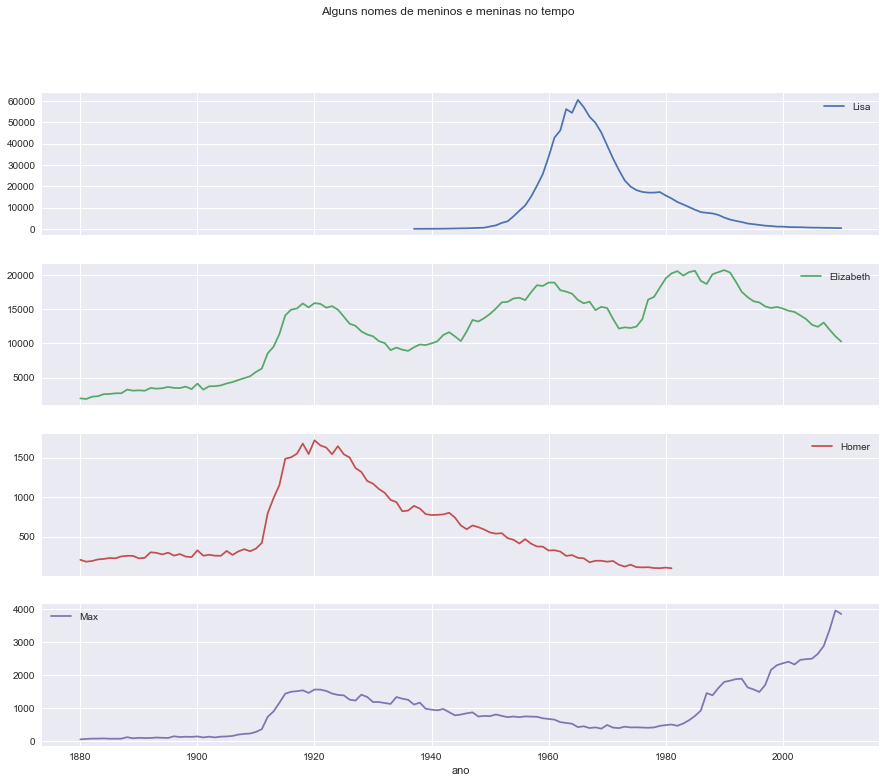

In [58]:
subset = total_nascidos[['Lisa','Elizabeth','Homer','Max']]

subset.plot(subplots=True, figsize=(15,12),grid=True,title='Alguns nomes de meninos e meninas no tempo')

plt.show()

In [46]:
Lisa = total_nascidos[['Lisa']]
Elizabeth = total_nascidos[['Elizabeth']]
Homer = total_nascidos[['Homer']]
Max = total_nascidos[['Max']]

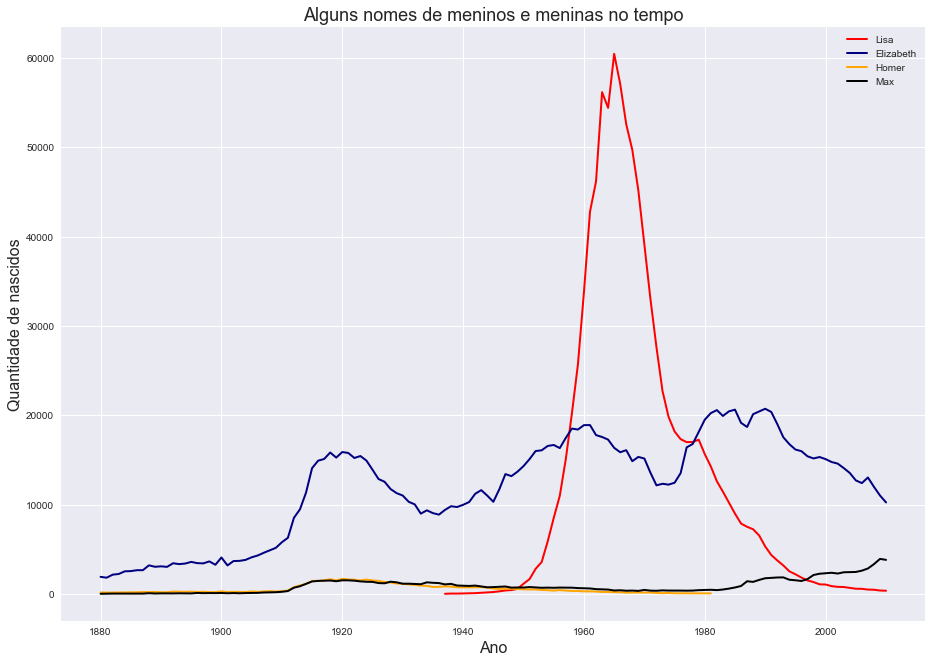

In [57]:
fig = plt.figure()

ax = fig.add_axes([0,0,1.5,1.5])
ax.plot(Lisa, color ='red', linewidth = 2, label = 'Lisa')

ax.plot(Elizabeth, color ='navy', linewidth = 2, label = 'Elizabeth')

ax.plot(Homer, color ='orange', linewidth = 2, label = 'Homer')

ax.plot(Max, color ='black', linewidth = 2, label = 'Max')

ax.set_title('Alguns nomes de meninos e meninas no tempo', fontsize =18)
ax.set_xlabel('Ano', fontsize = 16)
ax.set_ylabel('Quantidade de nascidos', fontsize = 16)

ax.legend()

In [48]:
table = top_mil.pivot_table('porcentagem', index='ano', columns='sexo',aggfunc=sum)

<AxesSubplot:title={'center':'Proporção de nascimentos representada nos 1.000 primeiros nomes, por sexo'}, xlabel='ano', ylabel='Soma dos nomes'>

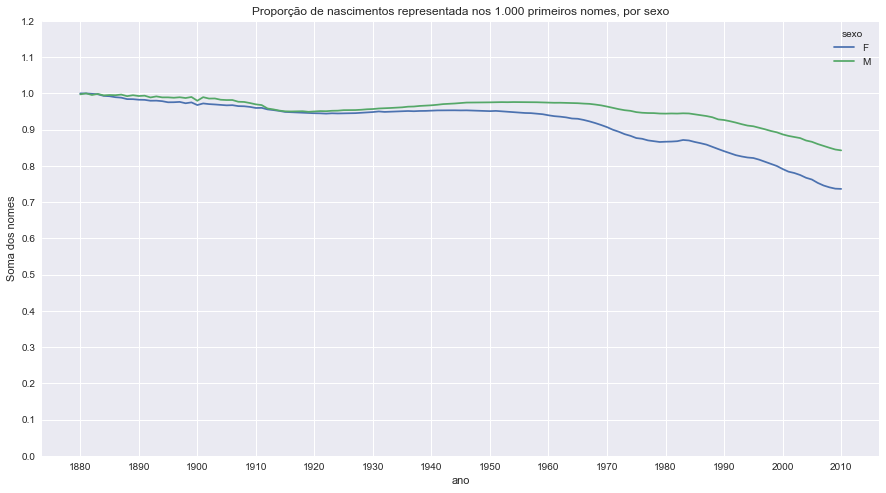

In [59]:
table.plot(title='Proporção de nascimentos representada nos 1.000 primeiros nomes, por sexo', yticks=np.linspace(0, 1.2 ,13), \
           xticks = range(1880, 2020,10), ylabel='Soma dos nomes', figsize=(15,8))


In [60]:
df_meninos = meninos[meninos.ano == 2010]

In [61]:
df_meninos

,nome,sexo,quantidade,ano,porcentagem
260876,Jacob,M,22139,2010,0.011546
260877,Ethan,M,18008,2010,0.009392
260878,Michael,M,17366,2010,0.009057
260879,Jayden,M,17191,2010,0.008966
260880,William,M,17060,2010,0.008897
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [62]:
porcen_soma_acumulada = df_meninos.sort_values(by ='porcentagem', ascending=False).porcentagem.cumsum()

In [63]:
porcen_soma_acumulada[:10]

260876    0.011546
260877    0.020938
260878    0.029995
260879    0.038961
260880    0.047858
260881    0.056599
260882    0.065185
260883    0.073453
260884    0.081559
260885    0.089644
Name: porcentagem, dtype: float64

In [64]:
porcen_soma_acumulada.values.searchsorted(0.5)

116

In [67]:
df_1900 = meninos[meninos.ano == 1900]
in1900 = df_1900.sort_values(by = 'porcentagem',ascending=False).porcentagem.cumsum()
in1900.values.searchsorted(0.5)+1

25

In [70]:
def combinacao(group,q=0.5):
    group = group.sort_values(by='porcentagem', ascending=False)
    return group.porcentagem.cumsum().values.searchsorted(q)+1

diversidade = top_mil.groupby(['ano','sexo']).apply(combinacao)
diversidade = diversidade.unstack('sexo')

In [71]:
diversidade

sexo,F,M
ano,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,210,99
2007,223,103
2008,234,109


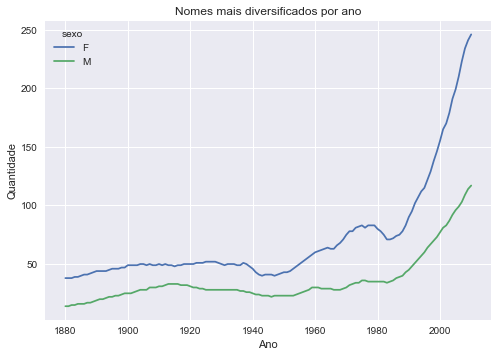

In [76]:
diversidade.plot(title='Nomes mais diversificados por ano', xlabel='Ano', ylabel='Quantidade')
plt.show()